In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/dailydelhiclimatetest/DailyDelhiClimateTrain.csv
/kaggle/input/dailydelhiclimatetest/DailyDelhiClimateTest.csv


In [8]:
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('/kaggle/input/dailydelhiclimatetest/DailyDelhiClimateTrain.csv',usecols=['date','meantemp'])

In [6]:
df.head()

,date,meantemp
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      1462 non-null   object 
 1   meantemp  1462 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.0+ KB


In [14]:
df["date"] = pd.to_datetime(df["date"])

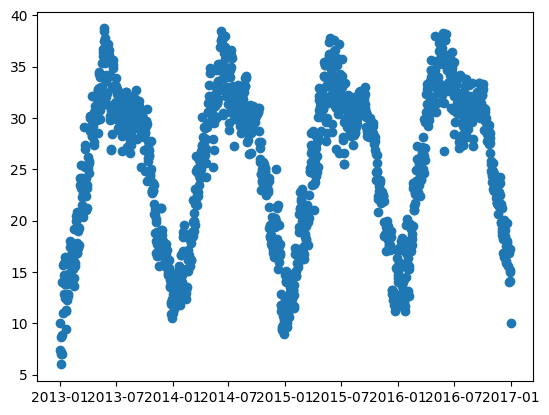

In [15]:
plt.scatter(x=df['date'],y=df['meantemp'])

In [21]:
x=df['meantemp'].ewm(alpha=0.9).mean()

In [22]:
x

0       10.000000
1        7.636364
2        7.213213
3        8.521452
4        6.252123
          ...    
1457    17.180754
1458    15.432361
1459    14.228950
1460    14.970263
1461    10.497026
Name: meantemp, Length: 1462, dtype: float64

In [23]:
df['ewma']=x

In [24]:
df.head()

,date,meantemp,ewma
0,2013-01-01,10.000000,10.000000
1,2013-01-02,7.400000,7.636364
2,2013-01-03,7.166667,7.213213
3,2013-01-04,8.666667,8.521452
4,2013-01-05,6.000000,6.252123


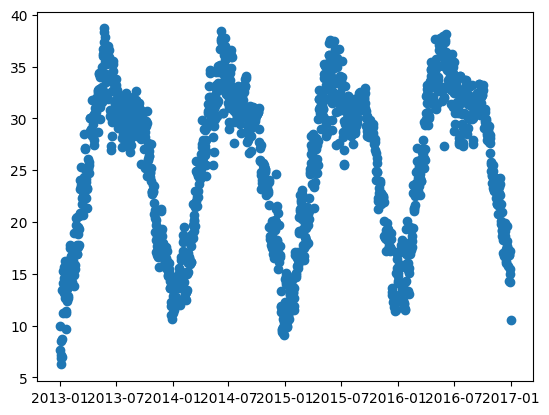

In [27]:
plt.scatter(x=df['date'],y=df['ewma'])